# **Entregable: Loan Approval Classification**

Descarga el archivo: loan_data.csv donde se incluyen datos ficticios asociados a clientes que han solicitado crédito a una organización financiera. La descripción de las columnas del dataset es la que sigue:

- person_age: Edad
- person_gender: Género
- person_education: Mayor nivel educacional
- person_income:  Ingreso anual
- person_emp_exp: Años de experiencia laboral
- person_home_ownership: Estado actual de vivienda  (e.g., rent, own, mortgage)          
- loan_amnt: Monto solicitado de crédito
- loan_intent: Objetivo del crédito
- loan_int_rate: Tasa de interés del crédito
- loan_percent_income: % del crédito respecto al ingreso anual
- cb_person_cred_hist_length: Años de historia crediticia
- credit_score: Credit score de la persona
- previous_loan_defaults_on_file: Indicador de solicitudes de crédito previas
- loan_status: (target variable) Loan approval status: 1 = approved; 0 = rejected

Source: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

Se solicita lo siguiente:

**1. Visualización y familiarización del dataset:** Se valorará el uso de las técnicas empleadas, así como la explicación de las visualizaciones / estadísticos utilizados. Esto incluye la limpieza de anomalías.

**2. Análisis de correlación:** Se valorará principalmente la interpretación de dichos análisis, así como la “limpieza” de la presentación.

**3. Desarrollo y justificación de las variables:** En base a las conclusiones sacadas en los puntos 1 y 2, ¿qué variables debemos utilizar en nuestro modelo de regresión logística?

**4. Estudio de regresión logística de loan_status:** ¿Qué resultados obtenemos en el modelo? ¿Predice correctamente? ¿Utilizarías este modelo en la vida real?

In [14]:
# Librerías necesarias
library(ggplot2)      # Gráficos
library(dplyr)        # Manipulación de datos

# Configuración de tema para gráficos
theme_set(theme_minimal() + 
          theme(plot.title = element_text(face = "bold", size = 14),
                axis.title = element_text(size = 11)))

#no warning messages
options(warn=-1)

## **1. Visualización y Familiarización del Dataset**

In [15]:
# Carga de datos (loan.csv)
data_dir <- file.path("C:/Users/cmoli/OneDrive/Documentos/GitHub",
					  "Fundamentos-de-la-ciencia-de-datos---Asignatura",
					  "Carga de datos")
loan <- read.csv(file.path(data_dir, "loan.csv"))
head(loan)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
,<dbl>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>
1,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
2,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
3,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
4,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
5,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1
6,21,female,High School,12951,0,OWN,2500,VENTURE,7.14,0.19,2,532,No,1


In [16]:
# Estructura del dataset
str(loan)

'data.frame':	45000 obs. of  14 variables:
 $ person_age                    : num  22 21 25 23 24 21 26 24 24 21 ...
 $ person_gender                 : chr  "female" "female" "female" "female" ...
 $ person_education              : chr  "Master" "High School" "High School" "Bachelor" ...
 $ person_income                 : num  71948 12282 12438 79753 66135 ...
 $ person_emp_exp                : int  0 0 3 0 1 0 1 5 3 0 ...
 $ person_home_ownership         : chr  "RENT" "OWN" "MORTGAGE" "RENT" ...
 $ loan_amnt                     : num  35000 1000 5500 35000 35000 2500 35000 35000 35000 1600 ...
 $ loan_intent                   : chr  "PERSONAL" "EDUCATION" "MEDICAL" "MEDICAL" ...
 $ loan_int_rate                 : num  16 11.1 12.9 15.2 14.3 ...
 $ loan_percent_income           : num  0.49 0.08 0.44 0.44 0.53 0.19 0.37 0.37 0.35 0.13 ...
 $ cb_person_cred_hist_length    : num  3 2 3 2 4 2 3 4 2 3 ...
 $ credit_score                  : int  561 504 635 675 586 532 701 585 544 640 ...
 $

In [17]:
#Resumen estadístico
summary(loan)

   person_age     person_gender      person_education   person_income    
 Min.   : 20.00   Length:45000       Length:45000       Min.   :   8000  
 1st Qu.: 24.00   Class :character   Class :character   1st Qu.:  47204  
 Median : 26.00   Mode  :character   Mode  :character   Median :  67048  
 Mean   : 27.76                                         Mean   :  80319  
 3rd Qu.: 30.00                                         3rd Qu.:  95789  
 Max.   :144.00                                         Max.   :7200766  
 person_emp_exp   person_home_ownership   loan_amnt     loan_intent       
 Min.   :  0.00   Length:45000          Min.   :  500   Length:45000      
 1st Qu.:  1.00   Class :character      1st Qu.: 5000   Class :character  
 Median :  4.00   Mode  :character      Median : 8000   Mode  :character  
 Mean   :  5.41                         Mean   : 9583                     
 3rd Qu.:  8.00                         3rd Qu.:12237                     
 Max.   :125.00                 

In [28]:
#Valores nulos, duplicados
#Detección de valores nulos
sapply(loan, function(x) sum(is.na(x)))
#Detección de valores duplicados
sum(duplicated(loan))


person_age                  person_gender 
                             0                              0 
              person_education                  person_income 
                             0                              0 
                person_emp_exp          person_home_ownership 
                             0                              0 
                     loan_amnt                    loan_intent 
                             0                              0 
                 loan_int_rate            loan_percent_income 
                             0                              0 
    cb_person_cred_hist_length                   credit_score 
                             0                              0 
previous_loan_defaults_on_file                    loan_status 
                             0                              0

[1] 0

In [29]:
#Outliers
#Detección de outliers
numeric_vars <- sapply(loan, is.numeric)
loan_numeric <- loan[, numeric_vars]
outlier_counts <- sapply(loan_numeric, function(x) {
    Q1 <- quantile(x, 0.25, na.rm = TRUE)
    Q3 <- quantile(x, 0.75, na.rm = TRUE)
    IQR <- Q3 - Q1
    sum(x < (Q1 - 1.5 * IQR) | x > (Q3 + 1.5 * IQR), na.rm = TRUE)
    })
outlier_counts

person_age              person_income 
                      2188                       2218 
            person_emp_exp                  loan_amnt 
                      1724                       2348 
             loan_int_rate        loan_percent_income 
                       124                        744 
cb_person_cred_hist_length               credit_score 
                      1366                        467 
               loan_status 
                     10000

,variable,outliers,n_valid,pct
,<chr>,<int>,<int>,<dbl>
loan_amnt,loan_amnt,2348,45000,5.22
person_income,person_income,2218,45000,4.93
person_age,person_age,2188,45000,4.86
person_emp_exp,person_emp_exp,1724,45000,3.83
cb_person_cred_hist_length,cb_person_cred_hist_length,1366,45000,3.04
loan_percent_income,loan_percent_income,744,45000,1.65
credit_score,credit_score,467,45000,1.04
loan_int_rate,loan_int_rate,124,45000,0.28


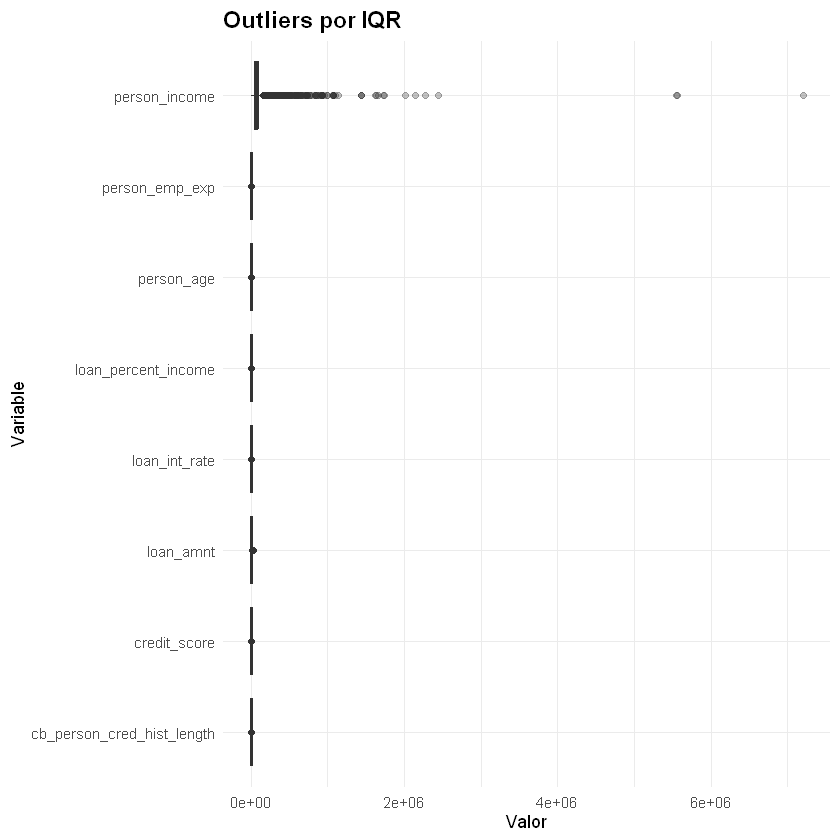

In [32]:
# Detectar variables numéricas y excluir binarias (0/1) y la etiqueta
is_binary <- function(x) is.numeric(x) && length(na.omit(unique(x))) <= 2
num_vars <- names(loan)[sapply(loan, is.numeric)]
bin_vars <- names(loan)[sapply(loan, is_binary)]
num_vars_clean <- setdiff(num_vars, c(bin_vars, "loan_status"))

# Contar outliers por IQR y calcular % sobre n válidos
iqr_outliers <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  sum(x < (Q1 - 1.5 * IQR) | x > (Q3 + 1.5 * IQR), na.rm = TRUE)
}
n_valid <- sapply(loan[num_vars_clean], function(x) sum(!is.na(x)))
counts <- sapply(loan[num_vars_clean], iqr_outliers)

outliers_tbl <- data.frame(
  variable = names(counts),
  outliers = as.integer(counts),
  n_valid = as.integer(n_valid),
  pct = round(100 * counts / pmax(n_valid, 1), 2)
)

outliers_tbl[order(-outliers_tbl$pct), ]

library(tidyr); library(ggplot2)
loan[num_vars_clean] |>
  pivot_longer(everything(), names_to = "var", values_to = "val") |>
  ggplot(aes(x = var, y = val)) +
  geom_boxplot(outlier.alpha = 0.3) +
  coord_flip() +
  labs(title = "Outliers por IQR", x = "Variable", y = "Valor")

In [ ]:
#EDA Gráficos de cada variable


## **2. Análisis de Correlación**